# Univariate Resemblance Analysis (URA) Dataset E

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from univariate_resemblance import basic_stats
from univariate_resemblance import student_t_tests
from univariate_resemblance import mann_whitney_tests
from univariate_resemblance import ks_tests
from univariate_resemblance import chi_squared_tests
from univariate_resemblance import scale_data
from univariate_resemblance import euclidean_distances
from univariate_resemblance import cosine_distances
from univariate_resemblance import js_distances
from univariate_resemblance import wass_distances

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/E_PimaIndiansDiabetes_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/E_PimaIndiansDiabetes_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/E_PimaIndiansDiabetes_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/E_PimaIndiansDiabetes_Synthetic_WGANGP.csv'}
categorical_columns = ['Outcome']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              2       84              0              0        0   0.0   
 1              9      112             82             24        0  28.2   
 2              1      139             46             19       83  28.7   
 3              0      161             50              0        0  21.9   
 4              6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 609            5      139             64             35      140  28.6   
 610            1       96            122              0        0  22.4   
 611           10      101             86             37        0  45.6   
 612            0      141              0              0        0  42.4   
 613            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age Outcome  
 0                       0.304   21       0 

## 2. Basic statistics comparisson
In this part the basic statistics of each attribute for each dataset are computed.
- means and stds of all variables are compared.

In [5]:
df_means_std = pd.DataFrame(index=data['Real'].select_dtypes(include=['float64','int64']).columns.tolist())
for name in DATA_TYPES :
    means_stds = basic_stats(data[name])
    means_stds.columns = [name]
    df_means_std = pd.concat([df_means_std,means_stds], axis=1)
df_means_std

,Real,GM,SDV,CTGAN,WGANGP
Pregnancies,3.74 ± 3.31,3.67 ± 3.44,3.56 ± 3.42,2.14 ± 3.46,1.93 ± 0.56
Glucose,120.86 ± 32.04,120.1 ± 31.99,120.36 ± 32.17,118.11 ± 44.06,122.36 ± 5.85
BloodPressure,69.42 ± 18.51,69.19 ± 19.21,68.96 ± 18.05,73.72 ± 23.16,71.27 ± 9.16
SkinThickness,20.4 ± 15.43,19.1 ± 16.53,19.9 ± 15.91,20.67 ± 16.23,9.38 ± 2.72
Insulin,81.44 ± 116.23,81.86 ± 114.71,80.67 ± 114.71,104.0 ± 174.62,41.03 ± 15.26
BMI,NaN,NaN,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN
Age,31.98 ± 7.74,31.89 ± 7.75,32.35 ± 7.91,26.93 ± 8.23,27.58 ± 1.35


## 3. Statistical Tests
In this part some statistical tests are performed to compare variables from real and synthetic data.

### 3.1. Sudent t-test
- null hypothesis (p > 0.05): Means of real and synthetic feature are the same.
- alternative hypothesis (p < 0.05): Mean of real and synthetic feature are significantly different.

In [6]:
p_values_student = dict()
for name in SYNTHESIZERS :
    p_values_student[name] = student_t_tests(data['Real'], data[name])
df_student_test = pd.DataFrame(data=p_values_student, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_student_test.to_csv('UNIVARIATE RESEMBLANCE RESULTS/student_t_tests.csv')
df_student_test

,GM,SDV,CTGAN,WGANGP
Pregnancies,0.7100,0.3430,2.6100e-16,3.8137e-38
Glucose,0.6786,0.7870,2.1162e-01,2.5239e-01
BloodPressure,0.8347,0.6610,3.3588e-04,2.6624e-02
SkinThickness,0.1542,0.5763,7.6491e-01,5.9799e-61
Insulin,0.9490,0.9077,7.8047e-03,3.8972e-17
BMI,0.8239,0.4138,2.8915e-27,7.9607e-41
DiabetesPedigreeFunction,0.9743,0.7355,7.2256e-07,3.0970e-23
Age,0.4937,0.4304,3.0303e-07,7.8041e-01


### 3.2. Mann-Whitney U-Test
- null hypothesis (p > 0.05): Real feature and synthetic feature come from the same population.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature does not come from the same population.

In [7]:
p_values_mann_whitnney = dict()
for name in SYNTHESIZERS :
    p_values_mann_whitnney[name] = mann_whitney_tests(data['Real'], data[name])
df_mann_whitney = pd.DataFrame(data=p_values_mann_whitnney, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_mann_whitney.to_csv('UNIVARIATE RESEMBLANCE RESULTS/mann_whitnney_tests.csv')
df_mann_whitney

,GM,SDV,CTGAN,WGANGP
Pregnancies,0.2090,0.2786,5.4664e-30,4.9521e-14
Glucose,0.4059,0.3893,3.4601e-02,3.2390e-05
BloodPressure,0.4764,0.0143,3.8144e-05,8.0726e-02
SkinThickness,0.0627,0.2195,4.7157e-01,5.2211e-35
Insulin,0.0036,0.0061,1.8375e-01,3.1727e-01
BMI,0.4032,0.1575,4.7363e-33,4.8515e-41
DiabetesPedigreeFunction,0.3068,0.0447,4.2759e-12,1.9336e-04
Age,0.1058,0.0748,1.5733e-05,7.6133e-11


### 3.3. Kolmogorov-Smirnov Test
- null hypothesis (p > 0.05): Real feature and synthetic feature distributions are equal.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature distributions are not equal.

In [8]:
p_values_ks = dict()
for name in SYNTHESIZERS :
    p_values_ks[name] = ks_tests(data['Real'], data[name])
df_ks = pd.DataFrame(data=p_values_ks, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_ks.to_csv('UNIVARIATE RESEMBLANCE RESULTS/ks_tests.csv')
df_ks

,GM,SDV,CTGAN,WGANGP
Pregnancies,1.2942e-01,1.3248e-03,1.7439e-27,4.0047e-52
Glucose,9.8536e-01,1.9031e-01,8.5835e-06,1.3480e-42
BloodPressure,9.7287e-01,1.9888e-05,1.1995e-12,1.3189e-13
SkinThickness,8.5835e-06,2.9567e-08,2.2077e-07,3.0061e-110
Insulin,3.2271e-15,4.6479e-16,3.2271e-15,2.7147e-62
BMI,6.4115e-01,2.7147e-01,1.2196e-26,5.5010e-93
DiabetesPedigreeFunction,4.5641e-01,6.7679e-04,2.5057e-10,3.6994e-54
Age,3.0346e-01,5.8211e-05,3.5955e-06,8.4291e-48


### 3.4. Join all p-values of all tests in one unique dataset

In [9]:
tests_all_data = np.round(np.concatenate([df_student_test.values, df_mann_whitney.values, df_ks.values] , axis=1),4)
#join results of all tests
df_tests_all = pd.DataFrame(data=tests_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_S','SDV_S','CTGAN_S','WGANGP_S','GM_M','SDV_M','CTGAN_M','WGANGP_M','GM_K','SDV_K','CTGAN_K','WGANGP_K'])
df_tests_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/STATISTICAL_TESTS_ALL.csv')
df_tests_all

,GM_S,SDV_S,CTGAN_S,WGANGP_S,GM_M,SDV_M,CTGAN_M,WGANGP_M,GM_K,SDV_K,CTGAN_K,WGANGP_K
Pregnancies,0.7100,0.3430,0.0000,0.0000,0.2090,0.2786,0.0000,0.0000,0.1294,0.0013,0.0,0.0
Glucose,0.6786,0.7870,0.2116,0.2524,0.4059,0.3893,0.0346,0.0000,0.9854,0.1903,0.0,0.0
BloodPressure,0.8347,0.6610,0.0003,0.0266,0.4764,0.0143,0.0000,0.0807,0.9729,0.0000,0.0,0.0
SkinThickness,0.1542,0.5763,0.7649,0.0000,0.0627,0.2195,0.4716,0.0000,0.0000,0.0000,0.0,0.0
Insulin,0.9490,0.9077,0.0078,0.0000,0.0036,0.0061,0.1838,0.3173,0.0000,0.0000,0.0,0.0
BMI,0.8239,0.4138,0.0000,0.0000,0.4032,0.1575,0.0000,0.0000,0.6411,0.2715,0.0,0.0
DiabetesPedigreeFunction,0.9743,0.7355,0.0000,0.0000,0.3068,0.0447,0.0000,0.0002,0.4564,0.0007,0.0,0.0
Age,0.4937,0.4304,0.0000,0.7804,0.1058,0.0748,0.0000,0.0000,0.3035,0.0001,0.0,0.0


### 3.4. Chi-Squared Test (categorical variables)
- null hypothesis (p > 0.05): There is not statistical relationship between real and synthetic feature.
- alternative hypothesis (p < 0.05): There is a statistical relationship between real and synthetic feature.

In [10]:
p_values_chi = dict()
for name in SYNTHESIZERS :
    p_values_chi[name] = chi_squared_tests(data['Real'], data[name])
df_chi = pd.DataFrame(data=p_values_chi, index=(data['Real'].select_dtypes(include=['category'])).columns)
df_chi.to_csv('UNIVARIATE RESEMBLANCE RESULTS/chi_squared_tests.csv')
df_chi

,GM,SDV,CTGAN,WGANGP
Outcome,0.9486,0.8987,0.901,0.7891


## 4. Distances calculation for each numerical variable
In this part some distance metrics are calculated for each numerical variable. First the data is scaled between 0 and 1.

In [11]:
#Scale the data
num_cols = (data['Real'].select_dtypes(include=['int64','float64'])).columns
scaled_data = dict()
for name in DATA_TYPES :
    scaled_data[name] = scale_data(data[name][num_cols])
scaled_data

{'Real':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
 0         0.1176   0.4221         0.0000         0.0000   0.0000  0.0000   
 1         0.5294   0.5628         0.6721         0.3810   0.0000  0.4203   
 2         0.0588   0.6985         0.3770         0.3016   0.0981  0.4277   
 3         0.0000   0.8090         0.4098         0.0000   0.0000  0.3264   
 4         0.3529   0.6734         0.6557         0.5873   0.4374  0.6885   
 ..           ...      ...            ...            ...      ...     ...   
 609       0.2941   0.6985         0.5246         0.5556   0.1655  0.4262   
 610       0.0588   0.4824         1.0000         0.0000   0.0000  0.3338   
 611       0.5882   0.5075         0.7049         0.5873   0.0000  0.6796   
 612       0.0000   0.7085         0.0000         0.0000   0.0000  0.6319   
 613       0.0000   0.6281         0.7869         0.0000   0.0000  0.3353   
 
      DiabetesPedigreeFunction     Age  
 0                      0

### 4.1. Euclidean distances
Square root of the sum of squares of differences between real feature and synthetic feature

In [12]:
euclidean_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    euclidean_dists[name] = euclidean_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_euclidean_dists = pd.DataFrame(data=euclidean_dists, index=num_cols)
df_euclidean_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/euclidean_distances.csv')
df_euclidean_dists

,GM,SDV,CTGAN,WGANGP
Pregnancies,7.5244,8.9540,6.6305,6.7679
Glucose,5.2501,5.9378,5.5301,6.8591
BloodPressure,5.2617,5.5804,5.4905,8.3217
SkinThickness,8.4693,8.5318,8.0575,7.8226
Insulin,12.2301,11.7321,5.9313,10.8262
BMI,4.7987,4.9379,6.7610,5.4624
DiabetesPedigreeFunction,5.0801,7.0063,5.3631,7.1864
Age,6.9876,9.2713,7.5123,11.1104


### 4.2. Cosine distances
Related with cosine similarity; the dot product of the two vectors divided by the product of the two vectors' lengths.

In [13]:
cosine_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    cosine_dists[name] = cosine_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_cosine_dists = pd.DataFrame(data=cosine_dists, index=num_cols)
df_cosine_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/cosine_distances.csv')
df_cosine_dists

,GM,SDV,CTGAN,WGANGP
Pregnancies,0.3620,0.2906,0.4481,0.2665
Glucose,0.0576,0.0748,0.0598,0.0916
BloodPressure,0.0604,0.0755,0.0517,0.0490
SkinThickness,0.3181,0.2419,0.3174,0.2573
Insulin,0.4606,0.4728,0.5226,0.4512
BMI,0.0516,0.0633,0.1659,0.0763
DiabetesPedigreeFunction,0.4106,0.3449,0.4457,0.2862
Age,0.4720,0.3003,0.4461,0.3053


### 4.3. Jensen-Shannon distances
Measures the similarity between two probability distributions.

In [14]:
js_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    js_dists[name] = js_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_js_dists = pd.DataFrame(data=js_dists, index=num_cols)
df_js_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/js_distances.csv')
df_js_dists

,GM,SDV,CTGAN,WGANGP
Pregnancies,0.0370,0.0351,0.0317,0.0264
Glucose,0.0457,0.0455,0.0489,0.0431
BloodPressure,0.0350,0.0363,0.0374,0.0444
SkinThickness,0.0440,0.0407,0.0413,0.0413
Insulin,0.0358,0.0348,0.0247,0.0356
BMI,0.0316,0.0346,0.0331,0.0388
DiabetesPedigreeFunction,0.0230,0.0302,0.0243,0.0244
Age,0.0331,0.0318,0.0391,0.0412


### 4.4. Wasserstein distances
Minimum amount of work required to transform a vector into another vector.

In [15]:
was_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    was_dists[name] = wass_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_was_dists = pd.DataFrame(data=was_dists, index=num_cols)
df_was_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/wass_distances.csv')
df_was_dists

,GM,SDV,CTGAN,WGANGP
Pregnancies,0.1134,0.2599,0.0523,0.1806
Glucose,0.0157,0.0792,0.0313,0.1559
BloodPressure,0.0348,0.0792,0.0961,0.2606
SkinThickness,0.0642,0.1802,0.0389,0.1031
Insulin,0.4379,0.4159,0.1261,0.3733
BMI,0.0897,0.0684,0.1590,0.0801
DiabetesPedigreeFunction,0.0167,0.1509,0.0152,0.2225
Age,0.0261,0.2941,0.0772,0.3666


### 4.5. Join all distances in an unique dataframe

In [16]:
distances_all_data = np.round(np.concatenate([df_cosine_dists.values, df_js_dists.values, df_was_dists.values] , axis=1),4)
#join results of all tests
df_dists_all = pd.DataFrame(data=distances_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_C','SDV_C','CTGAN_C','WGANGP_C','GM_J','SDV_J','CTGAN_J','WGANGP_J','GM_W','SDV_W','CTGAN_W','WGANGP_W'])
df_dists_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/DISTANCES_ALL.csv')
df_dists_all

,GM_C,SDV_C,CTGAN_C,WGANGP_C,GM_J,SDV_J,CTGAN_J,WGANGP_J,GM_W,SDV_W,CTGAN_W,WGANGP_W
Pregnancies,0.3620,0.2906,0.4481,0.2665,0.0370,0.0351,0.0317,0.0264,0.1134,0.2599,0.0523,0.1806
Glucose,0.0576,0.0748,0.0598,0.0916,0.0457,0.0455,0.0489,0.0431,0.0157,0.0792,0.0313,0.1559
BloodPressure,0.0604,0.0755,0.0517,0.0490,0.0350,0.0363,0.0374,0.0444,0.0348,0.0792,0.0961,0.2606
SkinThickness,0.3181,0.2419,0.3174,0.2573,0.0440,0.0407,0.0413,0.0413,0.0642,0.1802,0.0389,0.1031
Insulin,0.4606,0.4728,0.5226,0.4512,0.0358,0.0348,0.0247,0.0356,0.4379,0.4159,0.1261,0.3733
BMI,0.0516,0.0633,0.1659,0.0763,0.0316,0.0346,0.0331,0.0388,0.0897,0.0684,0.1590,0.0801
DiabetesPedigreeFunction,0.4106,0.3449,0.4457,0.2862,0.0230,0.0302,0.0243,0.0244,0.0167,0.1509,0.0152,0.2225
Age,0.4720,0.3003,0.4461,0.3053,0.0331,0.0318,0.0391,0.0412,0.0261,0.2941,0.0772,0.3666


## 5. Boxplots comparisson
In this part boxplots of each variable are plotted to analyse the statistical properties of each variable.

In [17]:
columns = (data['Real'].select_dtypes(include=['float64','int64'])).columns
len(columns)

8

In [18]:
boxplots_data = dict()
for c in columns :
    boxplots_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        boxplots_data[c] = np.column_stack((boxplots_data[c], data[name][c]))

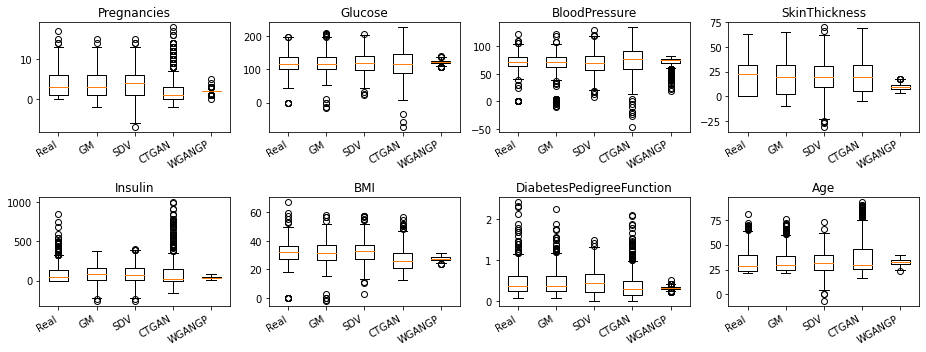

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(13,5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[1,0], 5:[1,1], 6:[1,2], 7:[1,3]}

for i in range(0,len(columns)) :
    axs[idx[i][0], idx[i][1]].boxplot(boxplots_data[columns[i]])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].set_xticklabels(DATA_TYPES)

for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")
#fig.suptitle('Boxplots of Dataset E - Indian Liver Patient', fontsize=18)
fig.tight_layout()
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/BOXPLOTS.svg', bbox_inches='tight')

## 6. Frequency distributions comparisson
In this part histograms of each variable are plotted to compare the frequency distributions.

In [20]:
columns = data['Real'].columns
len(columns)

9

In [21]:
hists_data = dict()
for c in columns :
    hists_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        hists_data[c] = np.column_stack((hists_data[c], data[name][c]))

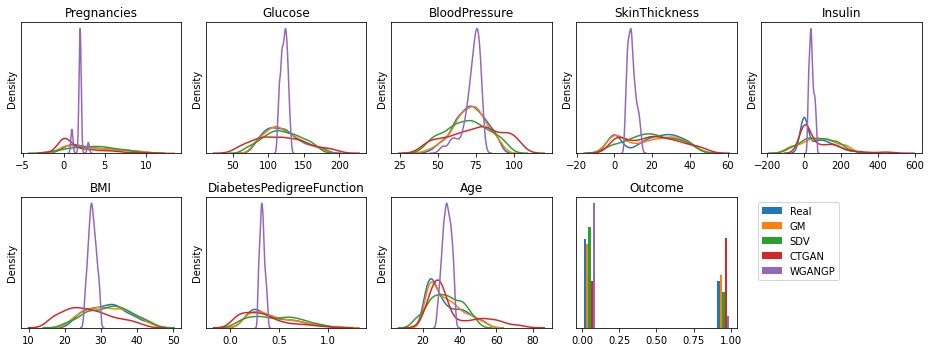

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(13,5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[0,4], 5:[1,0], 6:[1,1], 7:[1,2], 8:[1,3]}

for i in range(0,len(columns)):
    ax = axs[idx[i][0], idx[i][1]]
    ax.set_title(columns[i])
    if i in [0,1,2,3,4,5,6,7]:
        arr = hists_data[columns[i]]
        for col in range(arr.shape[1]):
            arr_col = np.sort(arr[:, col])
            sns.distplot(arr_col[int(0.05 * len(arr_col)) : int(0.95 * len(arr_col))], hist=False, norm_hist=False, ax=ax)
    else:
        ax.hist(hists_data[columns[i]], density=False, histtype='bar', label=DATA_TYPES, align='mid')
     
    ax.set_yticks([])
    

fig.delaxes(axs[1,4])
fig.tight_layout()
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.png')
axs.ravel()[8].legend(bbox_to_anchor=(1.1, 1),bbox_transform=axs.ravel()[8].transAxes)
# fig.subplots_adjust(top=0.75)
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.svg', bbox_inches='tight')